<a href="https://colab.research.google.com/github/ploybongkot/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ

1.ข้อมูลโจทย์ อยู่ใน ตัวแปร Data

2.ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

4.เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.

5.เขียน comments อธิบายทุกขั้นตอน

6.อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist

7.commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.


กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [35]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [36]:
Name = 'พลอยบงกช แสงโทโพธิ์' 
ID = '6230210514'  # Name และ ID เป็นของนักศึกษาเอง โดยตรงนี้จะทำให้ข้อมูลที่รันออกมาของแต่ละคนไม่เหมือนกัน

In [37]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [38]:
Data = DataGenerator(Name,ID)

021:22:16


In [39]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1.039391,-2.387036,-3.497922,-5.328267,-8.678718,5.779481,4.693726,-9.039305,-6.856747,-3.051316,6.208178,-0.728674,-1.209568,-4.733171,0.827332,6.909030,10.460851,-7.759243,-0.127631,-9.629069,6.704932,3.139379,-4.774071,17.696893
1,-2.999958,-4.629015,-10.804170,7.985572,5.308159,8.399965,8.504110,-9.641025,5.591738,-8.668149,10.835163,4.685492,8.879597,6.214357,9.352480,4.336378,6.581569,-10.334358,2.683914,5.646710,6.793222,-11.571979,-9.258030,-55.859897
2,-2.283070,-3.935774,-8.418309,8.670313,9.549606,8.862807,8.557430,-9.420667,4.948781,-9.387406,9.019193,5.089031,8.126972,4.569491,8.980044,4.464475,6.643625,-11.016075,3.601535,8.752679,7.641445,-10.735928,-7.871548,-51.679641
3,-9.194473,-1.185524,-7.995901,-2.984028,7.249680,9.372627,-3.179537,-7.506007,7.405280,9.820167,-2.988439,-9.940277,-5.472871,7.402530,-9.224066,-3.228680,-4.187613,-6.418757,-7.754833,-10.555908,-7.064370,0.923576,-2.371048,6.617879
4,-9.444201,-1.702016,-9.139871,-5.528101,8.312870,9.514219,-3.243645,-8.603491,7.066946,10.185779,-2.530092,-10.427762,-7.104209,6.688527,-8.415212,-2.749131,-2.056412,-4.710402,-8.011179,-10.562339,-8.208584,0.777821,-3.404031,5.889103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8.570663,7.745031,3.332551,-0.131125,7.754660,5.628446,-9.137776,4.680007,2.081125,-0.116858,-2.020254,-1.964122,-5.301779,6.363146,4.393194,-5.639505,5.383566,4.412469,5.423917,-5.223493,-3.606812,-3.393692,15.490063,-14.968462
9996,-3.842826,7.761330,8.457160,5.945992,-1.103217,-7.615587,-3.665617,-5.104629,-3.402164,-1.193836,0.588533,-5.866029,4.177580,4.930785,9.306959,-5.063622,2.325805,1.291390,-1.833363,-2.649395,5.420599,1.574869,15.522659,9.874343
9997,-0.311583,-5.155992,-0.031352,-3.847010,-7.231104,5.254831,6.039680,-12.467927,-5.154640,-4.414190,4.902544,-1.413603,0.676148,-3.840611,3.680246,8.088712,8.842759,-10.749802,0.801560,-8.552788,8.095367,4.019561,-10.311985,22.097806
9998,-4.375030,6.055453,7.682048,6.146512,0.789055,-6.143570,-3.665225,-3.816322,-4.300116,0.127750,1.098119,-5.090588,7.040712,4.018777,7.543468,-4.984854,1.728996,1.402700,-0.007905,-2.044807,5.931352,1.403840,12.110906,9.019200


In [40]:
Data.shape #ดูขนาดของข้อมูล Data  พบว่าข้อมูลมี 1000 แถว และ 24 columns

(10000, 24)

In [41]:
corr = np.corrcoef(Data.to_numpy().T)

In [42]:
corr.shape #ดูขนาดของ corrcoef ของ Data

(24, 24)

In [43]:
corr

array([[ 1.00000000e+00,  1.13101835e-01,  1.77531012e-01,
         1.94229017e-01, -1.39104568e-01,  1.65174747e-01,
         1.13800123e-01,  3.37514876e-02, -1.30953421e-01,
        -2.88983020e-01, -3.14360746e-02, -1.79196584e-02,
         2.01185033e-01,  3.51387084e-02,  1.00653889e-01,
        -4.18370508e-01, -2.02611067e-02,  3.66913013e-02,
         3.67145849e-03, -4.02863184e-04, -8.66267737e-02,
        -1.12311910e-01,  1.13101835e-01, -1.12311910e-01],
       [ 1.13101835e-01,  1.00000000e+00,  3.00942925e-01,
         6.64372149e-02,  1.05209110e-01,  1.54355181e-02,
        -5.17501098e-01,  5.19843582e-01, -2.19093525e-01,
        -7.18749655e-02, -3.68956684e-01, -2.48010200e-01,
         2.06673584e-02, -5.14239086e-02,  2.40227823e-01,
        -4.34151303e-01, -8.89258761e-02,  5.66941795e-02,
        -1.01959900e-01,  1.94901290e-02, -2.43661928e-02,
         6.22622477e-02,  1.00000000e+00,  6.22622477e-02],
       [ 1.77531012e-01,  3.00942925e-01,  1.00000000e

In [44]:
for i in range(corr.shape[0]): #ทำการวนลูปหาค่า correlation ที่ซ้ำกัน
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'column = {i}<=> column = {j} corrcoef = {corr[i,j]}') 


column = 1<=> column = 22 corrcoef = 1.0
column = 21<=> column = 23 corrcoef = 1.0
column = 22<=> column = 1 corrcoef = 1.0
column = 23<=> column = 21 corrcoef = 1.0


จากการวนลูปพบว่ามี correlation ที่ซ้ำกันจึงต้องทำการตัดข้อมูลออก

In [45]:
newdata = Data.iloc[:,1:]  

In [46]:
newdata

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-2.387036,-3.497922,-5.328267,-8.678718,5.779481,4.693726,-9.039305,-6.856747,-3.051316,6.208178,-0.728674,-1.209568,-4.733171,0.827332,6.909030,10.460851,-7.759243,-0.127631,-9.629069,6.704932,3.139379,-4.774071,17.696893
1,-4.629015,-10.804170,7.985572,5.308159,8.399965,8.504110,-9.641025,5.591738,-8.668149,10.835163,4.685492,8.879597,6.214357,9.352480,4.336378,6.581569,-10.334358,2.683914,5.646710,6.793222,-11.571979,-9.258030,-55.859897
2,-3.935774,-8.418309,8.670313,9.549606,8.862807,8.557430,-9.420667,4.948781,-9.387406,9.019193,5.089031,8.126972,4.569491,8.980044,4.464475,6.643625,-11.016075,3.601535,8.752679,7.641445,-10.735928,-7.871548,-51.679641
3,-1.185524,-7.995901,-2.984028,7.249680,9.372627,-3.179537,-7.506007,7.405280,9.820167,-2.988439,-9.940277,-5.472871,7.402530,-9.224066,-3.228680,-4.187613,-6.418757,-7.754833,-10.555908,-7.064370,0.923576,-2.371048,6.617879
4,-1.702016,-9.139871,-5.528101,8.312870,9.514219,-3.243645,-8.603491,7.066946,10.185779,-2.530092,-10.427762,-7.104209,6.688527,-8.415212,-2.749131,-2.056412,-4.710402,-8.011179,-10.562339,-8.208584,0.777821,-3.404031,5.889103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.745031,3.332551,-0.131125,7.754660,5.628446,-9.137776,4.680007,2.081125,-0.116858,-2.020254,-1.964122,-5.301779,6.363146,4.393194,-5.639505,5.383566,4.412469,5.423917,-5.223493,-3.606812,-3.393692,15.490063,-14.968462
9996,7.761330,8.457160,5.945992,-1.103217,-7.615587,-3.665617,-5.104629,-3.402164,-1.193836,0.588533,-5.866029,4.177580,4.930785,9.306959,-5.063622,2.325805,1.291390,-1.833363,-2.649395,5.420599,1.574869,15.522659,9.874343
9997,-5.155992,-0.031352,-3.847010,-7.231104,5.254831,6.039680,-12.467927,-5.154640,-4.414190,4.902544,-1.413603,0.676148,-3.840611,3.680246,8.088712,8.842759,-10.749802,0.801560,-8.552788,8.095367,4.019561,-10.311985,22.097806
9998,6.055453,7.682048,6.146512,0.789055,-6.143570,-3.665225,-3.816322,-4.300116,0.127750,1.098119,-5.090588,7.040712,4.018777,7.543468,-4.984854,1.728996,1.402700,-0.007905,-2.044807,5.931352,1.403840,12.110906,9.019200


เนื่องจาก dropna เอาชื่อ column ออกไม่ได้เลยทำการดูตารางได้แค่นี้

##ข้อ 2 ทำการ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

###Import

In [47]:
from sklearn.cluster import  KMeans #นำข้อมูลเข้า

###Define

In [48]:
kmeans = KMeans(random_state=2021) #เป็นคำสั่งของการกำหนดค่า K แต่ค่า K ที่เป็น Default เรายังไม่กำหนด

##Fit- transform

####คำนวณหาจุด cluter centers ของข้อมูล newdata ด้วยวิธี K-means clustering

In [49]:
kmeans.fit(Data) #คำนวณหาจุด cluter centers ของข้อมูล newdata ด้วยวิธี K-means clustering 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [81]:
kmeans.cluster_centers_ #เเสดง จุด cluster centers ที่คำนวณออกมาได้

array([[-9.13109637e-01, -2.16581197e-01,  4.10603086e+00,
        -3.95580229e+00, -3.26256639e+00,  7.53365208e+00,
        -4.72691165e+00, -1.56035946e+00, -9.24655872e+00,
         6.51009874e-01, -8.55778396e-01,  5.27687525e+00,
        -3.06273785e+00, -3.91890446e+00, -7.69051093e+00,
         1.86438489e+00,  1.99459790e+00,  5.56519183e-01,
         2.87335322e+00, -3.94375852e+00, -3.72056761e-02,
        -1.82621927e+00,  1.81397162e+00],
       [-3.90047493e+00, -8.80747632e+00,  7.90266258e+00,
         8.16519985e+00,  9.04575288e+00,  8.42603717e+00,
        -9.38733678e+00,  7.50892788e+00, -9.14745584e+00,
         9.66660911e+00,  5.14301736e+00,  7.97313867e+00,
         5.06873480e+00,  8.13162718e+00,  4.84973393e+00,
         8.10766890e+00, -9.40378105e+00,  3.58989207e+00,
         6.85266176e+00,  7.70836659e+00, -9.15771178e+00,
        -7.80094987e+00, -4.37885589e+01],
       [ 5.24004168e+00, -4.57554420e+00,  2.13368184e+00,
         8.11733271e+00,  6.8

###ทดสอบการจัดกลุ่มของ Data

In [50]:
y = kmeans.predict(Data) #กำหนดให้ข้อมูลที่ทำการจัดกลุ่มเป็น y 
y

array([6, 4, 4, ..., 6, 5, 5], dtype=int32)

## PCA 

ทำ PCA เพื่อลด Dimention ของข้อมูล

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

new_pca = pca.fit_transform(newdata)

In [52]:
from matplotlib import pyplot as plt

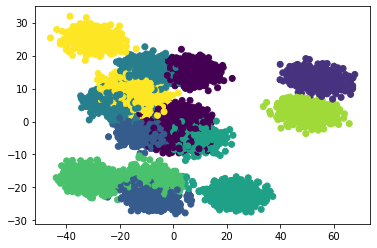

In [53]:
kmeans = KMeans(random_state=2021)
kmeans.fit(newdata)
y = kmeans.predict(newdata)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

##ดูว่าค่า K ควรเป็นเท่าไหร่

##" หาค่า k ด้วยวิธี Elbow Method"

###SSE

In [54]:
kmeans.inertia_  #ทำการคำนวณค่า SSE ของ data

3804118.0292088715

In [55]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [56]:
SSE

[13781913.857352642,
 9531047.93527796,
 7893793.770690319,
 6909815.866515603,
 5921999.64541768,
 5212367.236653116,
 4637506.289524077,
 4108690.5643300726]

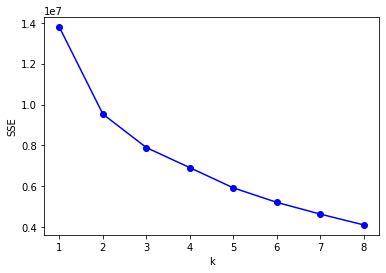

In [57]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b') #ทำการนำค่า SSE ที่ได้มา plot กราฟเพื่อดูว่ามีกี่ k กลุ่ม
plt.xlabel('k')
plt.ylabel('SSE');

จากกราฟจะบอกได้ว่า k มีทั้งหมด 4 กลุ่ม ดูจากจุดที่ k ที่ 4 เริ่มมีความแตกต่างของระยะห่างระหว่างจุด โดยหลังจุดที่ k ที่ 4 เริ่มมีระยะห่างที่ลดลงเท่าๆกัน 

##หาค่า k ด้วยวิธี " The silhouette coefficient "

In [58]:
from sklearn import metrics #นำ import metrics มาใช้

In [59]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

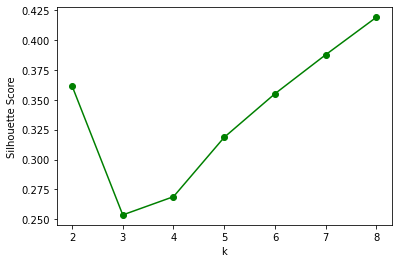

In [61]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g') 
plt.xlabel('k')
plt.ylabel('Silhouette Score');

จากกราฟ จะบอกได้ว่า k แบ่งออกได้ 8 กลุ่ม และจุดที่มีค่าสูงที่สุดเท่ากับ 0.425



จากการดูกราฟ The elbow method และ The silhouette coefficient เพื่อหาค่า k ที่เหมาะสม พบว่าวิธี The elbow method มีค่า k = 4 และ วิธี The silhouette coefficient มีค่า k ๙๙๙๙๙๙๙๙๙๙= 8 เราจึงเลือกใช้ k = 8 ในการจัดกลุ่มของ Data ชุดนี้ 

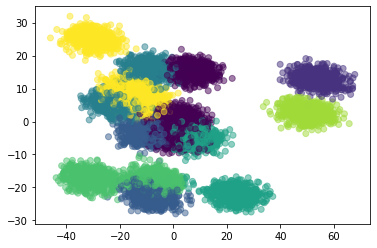

In [75]:
kmeans = KMeans(n_clusters = 8,random_state=2021)
kmeans.fit(newdata)
y = kmeans.predict(newdata)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.5)

จากกราฟจะเห็นได้ว่า เมื่อจัดกลุ่ม k ให้เท่ากับ 8 กลุ่มแล้ว จะมีข้อมูลบางจำนวนที่ทับซ้อนกัน เนื่องจากข้อมูลชุดนี้ปริมาณที่มาก

##ข้อ 3 ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

#ทำMDS

ทำ MDS เพื่อลด Dimention ของข้อมูล

In [67]:
from sklearn.manifold import MDS

In [68]:
mds = MDS(n_components=2) #กำหนดว่าเราจะใช้ components ของ mds เป็น 2

In [69]:
new_mds = mds.fit_transform(Data) #ทำการคำนวณข้อมูล คำนวณระยะห่างระหว่างจุด

In [82]:
kmeans2 = KMeans(n_clusters = 8,random_state=2021) #กำหนดกลุ่ม k = 8
kmeans2.fit(Data)
p = kmeans2.predict(Data) #กำหนดให้ข้อมูลที่ทำการจัดกลุ่มเป็น p

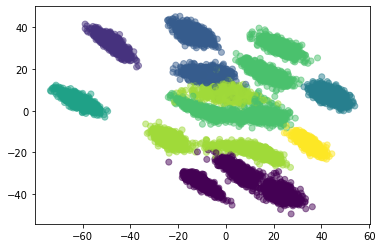

In [83]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=p,alpha=0.5)

จากกราฟที่ได้ พบว่าเมื่อแบ่งกลุ่มของ Data เป็น 8 กลุ่ม ข้อมูลบางจำนวนยังมีการทับซ้อนกันอยู่ เนื่องจากข้อมูลมีปริมาณมาก

##ข้อ 4 เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.

##กราฟ ข้อ 2

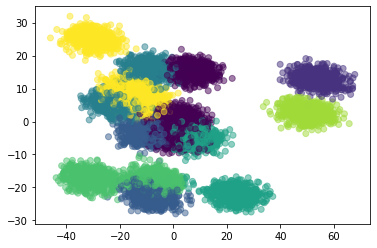

In [84]:
kmeans = KMeans(n_clusters = 8,random_state=2021)
kmeans.fit(newdata)
y = kmeans.predict(newdata)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.5)

##กราฟ ข้อ 3

Text(0.5, 1.0, 'DataGenerator')

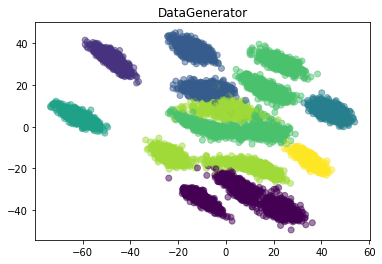

In [86]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=p,alpha=0.5)
plt.title('DataGenerator')

จากการทำกราฟ ข้อ 2 กับ ข้อ 3 มีการกระจายข้อมูลที่แตกต่างกันโดยสามารถสรุปได้ดังนี้

กราฟข้อ 2 มีการจัดกลุ่ม clustering และทำการลดจำนวน Dimension ของข้อมูล โดยการทำ PCA ในการลด Dimension โดยจุดของข้อมุลจะอยู่ที่เดิม

กราฟข้อ 3 ได้ทำการ clustering ซึ่งทำการลด Dimention ด้วยวิธี MDS โดยทุกๆจุดของข้อมูลจะยึดจุดตั้งต้นที่กำหนดเป็นหลัก จึงทำให้แตกต่างกัน และได้ผลลัพธ์ออกมาจึงไม่เหมือนกัน

ขอบคุณค่ะ